In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image 
from scipy import stats

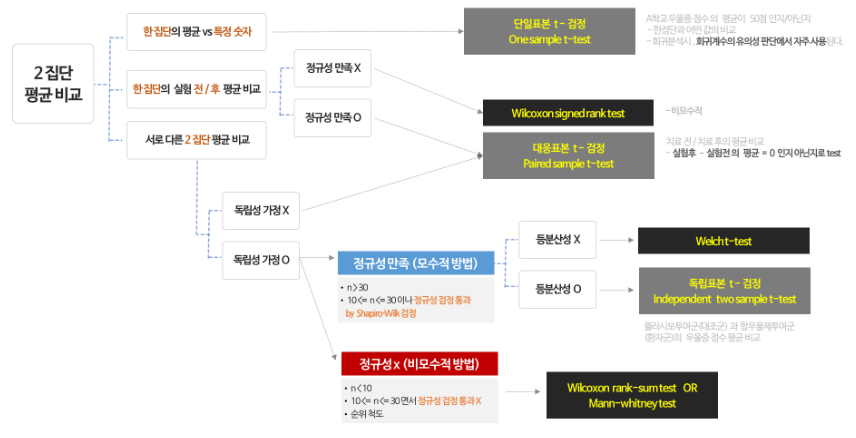

In [19]:
Image('7.png')

## Binomial Test 이항검정

- 베르누이분포의 모수에 대해 검정을 하려면 베르누이분포 표본의 합이라는 통계량이 이항분포를 따른다는 성질을 이용하면 됨

H0: mu = 0.5

In [ ]:
scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')

In [22]:
N = 10
mu_0 = 0.5
np.random.seed(0)
x = stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [24]:
stats.binomtest(n, N)

BinomTestResult(k=7, n=10, alternative='two-sided', statistic=0.7, pvalue=0.34375)

유의확률 p-value가 0.05보다 높으므로 do not reject H0. mu=0.5

In [26]:
N = 100
mu_0 = 0.5
np.random.seed(0)
x = stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [28]:
stats.binomtest(n, N)

BinomTestResult(k=49, n=100, alternative='two-sided', statistic=0.49, pvalue=0.9204107626128211)

유의확률 p-value가 0.05보다 높으므로 do not reject H0. mu=0.5

In [30]:
N = 100
mu_0 = 0.35
np.random.seed(0)
x = stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [31]:
stats.binomtest(n, N)

BinomTestResult(k=31, n=100, alternative='two-sided', statistic=0.31, pvalue=0.00018314322488235366)

유의확률 p-value가 0.05보다 작으므로 reject H0. mu ≠ 0.35

Q. 이항검정을 사용하여 다음 문제를 풀어라. 유의수준은 10%다.

여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [32]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [33]:
tips.shape

(244, 7)

In [ ]:
mu_0 = 
stats.bernoulli()
stas.binomtest(tips.sex

https://heannim-world.tistory.com/59

## 카이제곱검정

- 모수가 범주형인 경우
- 범주형 확률분포의 모수 μ=(μ1,…,μK) 에 대한 가설을 조사하는 검정 방법으로 적합도검정(goodness of fit test)이라고 부름
- 원래 범주형 값 k가 나와야 할 횟수의 기댓값 mk와 실제 나온 횟수 xk의 차이를 이용하여 검정통계량을 구함

<br>
scipy.stats.chisquare(f_obs, f_exp=None)

- f_obs : 데이터 행렬

- f_exp : 기댓값 행렬

데이터 개수 N=10, , 귀무가설 모수 μ0=(0.25,0.25,0.25,0.25), 실제 데이터 (0,3,5,2)인 경우 대해 카이제곱검정 

In [34]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [35]:
stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

유의확률이 17.8%로 높으므로 do not reject H0.따라서 μ0=(0.25,0.25,0.25,0.25)

### 1) 적합도검정 Goodness of fit

- 카이제곱 분포에 기초한 통계적 방법
- 관찰된 빈도가 기대 빈도와 의미 있게 다른지의 여부를 검증하기 위해 사용되는 검증방법
- 자료가 빈도로 주어졌을 때, 특히 명목 척도 자료의 분석에 이용
- 질적 자료와 질적 자료 간에 서로 통계적으로 관계가 있는지 판단하는 검정
- 단일 표본의 모집단이 정규분포를 따르며 분산을 미리 알고 있는 경우에 적용

Q. A : 결혼식을 한다고 할 때 200명쯤 올 것이다. 하는 것은 기대치이고, 결혼식 당일 220명이 왔다. 는 관찰치이다.

B : 집들이를 한다고 할 때 20명이 올 것이다. 하는 것은 기대치이고, 집들이 당일 40명이 왔다. 는 관찰치이다.

A와 B 경우의 기대치-관찰치 차이는 20으로 똑같다. 하지만 정말 같은 차이일까?

Q2. 제품의 판매량 비율은 다음과 같습니다. 

- A 56%, B 12%, C 32%
- 그런데, 특정 지역에 제품 A, B, C의 보유대수를 조사하니, 각각 324대, 78대, 261대였습니다. 이 자료로 다음과 같이 관찰 빈도와 기대 빈도를 만들 수 있다.

- 귀무가설 H0는 관찰 빈도는 기대 빈도와 같다.
- 대립가설 H1은 관찰 빈도는 기대 빈도와 다르다.

In [84]:
xo, xe = [324, 78, 261], [371, 80, 212]
xc = pd.DataFrame([xo, xe], columns=['Item A', 'Item B', 'Item C'], 
               index=['관찰', '기대'])
xc

,Item A,Item B,Item C
관찰,324,78,261
기대,371,80,212


In [85]:
from scipy.stats import chisquare
chisquare(xo, f_exp=xe)

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

귀무가설 기각, 관찰빈도와 기대빈도가 다름

Q. 주사위를 n번 던졌을 때 나오는 데이터의 차이가 있는지 없는지 알아보기

In [95]:
# H0: 두 변수는 연관성이 없음. 차이가 없음. 주사위 프로그램이 제대로 만들어짐
# H1: 두 변수는 연관성이 있음. 차이가 있음. 주사위 프로그램은 문제가 있음

# 관측값
data1 = [4,6,17,16, 8, 9]  # 임의의 수
# 기대값
data2 = [10,10,10,10,10,10]         

stats.chisquare(data1, data2)

Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)

In [97]:
statistic, pvalue = stats.chisquare(data1, data2) #zip 형태처럼 두개의 변수에 값을 각각 할당
print("static : {}, p-value : {}".format(statistic,pvalue))
if pvalue < 0.05:
    print("신뢰수준하에서 유의한 관계. 대립가설 채택")
else:
    print("신뢰수준하에서 무의미한 관계. 귀무가설 채택")

static : 14.200000000000001, p-value : 0.014387678176921308
신뢰수준하에서 유의한 관계. 대립가설 채택


Q. 학년 분포가 모든 학년에 균일한지 여부 확인,

171명 (1학년 86, 2학년 36, 3학년 30, 4학년 19명)

유의수준 0.05

기대빈도는 전체 표본의 기대비율(25%)

In [103]:
(171*0.25)

42.75

In [104]:
data1 = [86, 36, 30, 19]
data2 = [171*0.25, (171*0.25), (171*0.25), (171*0.25)]

In [105]:
stats.chisquare(data1, data2)

Power_divergenceResult(statistic=61.8187134502924, pvalue=2.4021451008245795e-13)

In [106]:
statistic, pvalue = stats.chisquare(data1, data2)
if pvalue < 0.05:
    print('pvalue가 {}이므로 귀무가설 기각, 모든 학년의 분포는 균일하지 않음'.format(pvalue))
else:
    print('pvalue가 {}이므로 귀무가설 기각하지 않음, 모든 학년의 분포는 균일'.format(pvalue))

pvalue가 2.4021451008245795e-13이므로 귀무가설 기각, 모든 학년의 분포는 균일하지 않음


### 2) 독립검정 Test of independence

- 어떤 범주형 확률변수 X가, 다른 범주형 확률변수 Y와 독립인지 상관관계를 가지는가를 검증하는데 사용
<br>
- ex) 선호하는 음식의 종류와 연령이 서로 관령성이 있는지를 알고 싶을 때
    <br> 교육수준과 수업이 연관관계가 있는지 없는지
    <br> 나이와 정당선호도가 연관이 되는지 없는지

- 귀무가설 : 독립이다
- 대립가설 : 독립이 아니다.
- 여기서 독립이라는 의미는 인과관계 혹은 연관이 없다는 말이 될 수 있다.

<br>
- 분할표(contingency table)

- 두 확률변수가 독립이라면 X=0일 때의 Y분포와 X=1일 때의 Y분포가 같아야 한다. 따라서 두 경우의 표본 집합이 같은 확률분포에서 나왔다는 것을 귀무가설로 하는 카이제곱검정을 하여 채택된다면 두 확률변수는 독립이다. 만약 기각된다면 두 확률변수는 상관관계가 있다.

- chi2_contingency() 명령은 이러한 검정을 수행한다. X의 값에 따른 각각의 Y분포가 2차원 표(contingency table)의 형태로 주어지면 독립인 경우의 분포와 실제 y 표본본포의 차이를 검정통계량으로 계산한다. 이 값이 충분히 크다면 X와 Y는 상관관계가 있다

In [ ]:
#독립성검정
statistic,pvalue,_,_ = stats.chi2_contingency(obs) 
# ,_,_는 굳이 넣지 않은 자유도나 타 조건들을 의미한다.

print("static : {}, p-value : {}".format(statistic,pvalue))
if pvalue < 0.05:
print("신뢰수준하에서 유의한 관계. 대립가설 채택")
else:
print("신뢰수준하에서 무의미한 관계. 귀무가설 채택")

Q  두 개의 광고 서비스를 통해 각각 유입된 사용자들의 이용률을 독립성 검정을 이용해 분석해라.
- 귀무가설 : 모집단 sample A와 모집단 sample B의 지속 이용 전환율은 다르지 않다.
- 대립가설 : 모집단 sample A와 모집단 sample B의 지속 이용 전환율은 다르다.

In [109]:
data1 = np.array([40,165]) # 지속이용사용자수, 해지한 사용자 수
data2 = np.array([62,228]) 

In [111]:
mean1 = data1[0]/np.sum(data1) #전체유입 대비 남은사람 비율
mean2 = data2[0]/np.sum(data2) #전체유입 대비 남은사람 비율

In [112]:
statistic,pvalue,df,e = stats.chi2_contingency([data1, data2]) 
print("static : {}, p-value : {}".format(statistic,pvalue))
if pvalue < 0.05:
    print("신뢰수준0.05 하에서 귀무가설 기각. 유의한 관계. 대립가설 채택")
else:
    print("신뢰수준0.05 하에서 귀무가설 기각하지 않음. 무의미한 관계. 귀무가설 채택")

static : 0.15451791002162868, p-value : 0.694254736449269
신뢰수준0.05 하에서 귀무가설 기각하지 않음. 무의미한 관계. 귀무가설 채택


## 단일표본 z검정
- 분산 σ^2의 값을 정확히 알고 있는 정규분포의 표본에 대해 기댓값을 조사
- 많이 사용되지 않고 사이파이에 별도의 함수가 준비되어 있지 않으므로 norm 명령의 cdf 메서드를 사용하여 직접 구현해야 한다.

실제 모수 μ0=0, σ2=1인 경우 대해 표본 데이터 N=10개를 시뮬레이션으로 구하여

귀무가설 μ0=0에 대한 단일표본 z검정 명령

In [39]:
N = 100
mu_0 = 0
np.random.seed(0)
x = stats.norm(mu_0).rvs(N)

def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * stats.norm().sf(np.abs(z))

ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

유의확률이 54.98%이므로 귀무가설을 기각할 수 없다. 따라서 μ=0

## t검정: 두집단간 평균 비교

### 1) 단일표본 t검정: 한 집단 평균 검정

- 하나의 데이터집단의 평균과 비교 관측치 차이 검정
<br>

- 정규분포의 표본에 대해 기댓값을 조사하는 검정방법
- 검정통계량으로 스튜던트 t분포를 가진 t통계량을 사용
<br>

- ttest_1samp(a, popmean) 
    - a: 표본 데이터 배열
    - popmean: 귀무가설의 기댓값
<br>

- 귀무가설: 표본의 평균이 모집단 평균과 일치함
- 대립가설: 표본의 평균이 모집단 평균과 일치하지 않음

N=10, 실제 모수 μ0=0인 경우 대해 단일표본 t검정 

In [41]:
N = 100
mu_0 = 0
np.random.seed(0)
x = stats.norm(mu_0).rvs(N)
stats.ttest_1samp(x, popmean=0)

TtestResult(statistic=0.5904283402851698, pvalue=0.5562489158694675, df=99)

Q. 표본의 평균 키가 모집단 평균 175와 같은가?

In [115]:
one_sample = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
np.mean(one_sample)

177.96

In [117]:
result = stats.ttest_1samp(one_sample, 175)
result

TtestResult(statistic=2.5544677238820483, pvalue=0.030966923171410254, df=9)

In [118]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%(result))

t검정 통계량 = 2.554, pvalue = 0.031


### 2) 독립표본 t검정: 두 집단 평균 검정

- 독립표본 t검정(Independent-two-sample t-test)은 두 개의 독립적인 정규분포에서 나온 N1, N2개의 데이터 셋을 사용하여 두 정규분포의 기댓값이 동일한지 검정
<br>

- stats.ttest_inds(a, b, equal_var = True)
    - a: 1번 표본 집합 데이터
    - b: 2번 표본 집합 데이터
    - equal_var: 두 표본 집합의 분산이 같은경우에는 True
    
<br>

- 귀무가설: 두 집단의 평균이 일치한다
- 대립가설: 두 집단의 평균이 일치하지 않는다

<br>

- 독립표본 t검정은 두 정규분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정통계량이 다르기 때문에 equal_var 인수를 사용하여 이를 지정해 주어야 한다. 두 분포의 분산이 같은지 다른지는 다음에 나올 등분산검정(equal-variance test)을 사용하면 된다. 만약 잘 모르겠으면 equal_var=False로 놓으면 된다

Q. 두 집단의 평균점수 차이

In [120]:
female = [63.8, 56.4, 55.2, 58.5, 64.0, 51.6, 54.6, 71.0]
male = [75.5, 83.9, 75.7, 72.5, 56.2, 73.4, 67.7, 87.9]
result = stats.ttest_ind(male, female)
result

Ttest_indResult(statistic=3.587521542539111, pvalue=0.002971151455277398)

In [121]:
print("t검정 통계량: %.3f, pvalue=%.3f"%(result))

t검정 통계량: 3.588, pvalue=0.003


두 정규분포의 기댓값이 μ1=0, μ2=0.5로 다르고 

분산은 σ1=σ2=1으로 같으며 표본의 수가 N1=N2=10인 경우

시뮬레이션해보자. 우리는 분산 값이 정말 같은지 모르므로 일단 equal_var=False

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\3345414680.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\3345414680.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kd

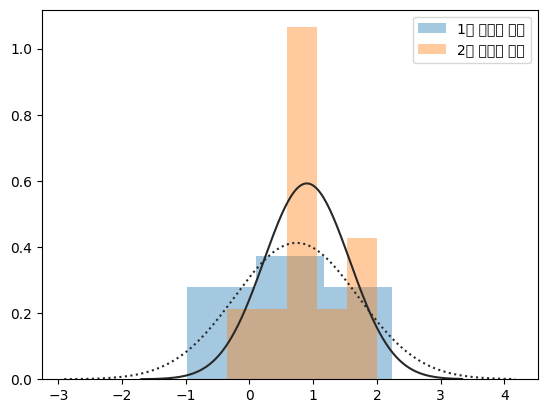

In [49]:
N_1 = 10
mu_1 = 0
sigma_1 = 1
N_2 = 10
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)

x1 = stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = stats.norm(mu_2, sigma_2).rvs(N_2)
ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [50]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

t검정의 결과는 유의확률 68.4%이므로 두 기댓값이 같다는 귀무가설을 기각할 수 없다. 따라서 μ1=μ2임

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\3369130492.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\3369130492.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kd

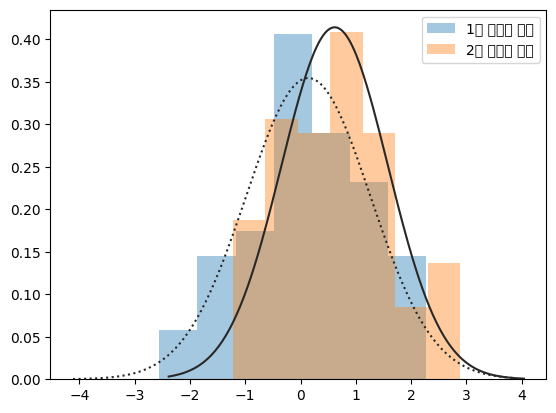

In [51]:
N_1 = 50
mu_1 = 0
sigma_1 = 1
N_2 = 100
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)

x1 = stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = stats.norm(mu_2, sigma_2).rvs(N_2)
ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [52]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-2.5427747064864556, pvalue=0.012800307550312669)

데이터의 개수를 50개와 100개로 증가시킨 경우에 유의확률은 0.8%로 감소했다. 따라서 두 확률분포의 기댓값이 일치한다는 귀무가설은 기각할 수 있고 2종오류는 발생하지 않는다

### 3) 대응표본 t검정: 같은 집단의 대응되는 두 변수 비교

- before & after 변화 비교

- 독립표본 t검정과 마찬가지로 두 정규분포의 기댓값이 같은지 확인하기 위한 검정이다. 통계량은 대응하는 표본 값의 차이 xd=xi,i−xi,2에서 다음처럼 계산

- stats.ttest_rel(a, b)
    - a: 1번 표본 집합 데이터
    - b: 2번 표본 집합 데이터
    

In [124]:
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]
paired_sample = stats.ttest_rel(baseline, follow_up)
print('t검정 통계량 = %.3f, pvalue = %.3f'%paired_sample)

t검정 통계량 = 3.668, pvalue = 0.006


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\2482925936.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\2482925936.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kde=

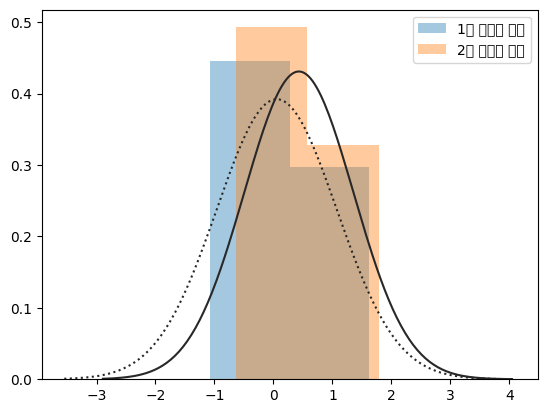

In [57]:
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = stats.norm(mu_1).rvs(N)
x2 = x1 + stats.norm(mu_2, 0.1).rvs(N)

ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

### 연습문제
Q1.귀무가설 : 학생들의 평균키는 175cm이다.  대립가설 : 학생들의 평균키는 175cm가 아니다.

In [125]:
np.random.seed(1)
heights = [180 + np.random.normal(0,5) for a in range(20)]

In [127]:
heights

[188.1217268183162,
 176.94121793174963,
 177.35914123868272,
 174.63515688921916,
 184.32703814662338,
 168.49230651559859,
 188.7240588210824,
 176.19396549552448,
 181.5951954802855,
 178.75314812261294,
 187.31053968522488,
 169.69929645251173,
 178.38791397993245,
 178.07972822665792,
 185.6688472116772,
 174.50054366342985,
 179.13785896224783,
 175.61070791039313,
 180.21106873357797,
 182.9140760685791]

In [129]:
# ttest_1samp: 독립표본 T검정

stats.ttest_1samp(heights, 175)
print("단일표본 T-검정  검정통계량: %.3f, pvalue: %.3f" % result)
if pvalue < 0.05:
    print("대립가설 채택: 평균키는 175가 아니다")
else:
    print("귀무가설 채택: 평균키는 175이다")

단일표본 T-검정  검정통계량: 3.588, pvalue: 0.003
귀무가설 채택: 평균키는 175이다


Q2. 귀무가설 : 학생들의 평균키가 같지 않다.(상과관계가 없다.)

#대립가설 : 학생들의 평균키가 같지 않다.(내가 주장하고 싶은 것, 상관관계가 있다.)

In [131]:
np.random.seed(1)
group1=[170+np.random.normal(0,5) for a in range(20)] #170 근처의 값이 나오도록 설정한다.
group2=[175+np.random.normal(0,10) for a in range(20)] #175 근처의 값이 나오도록 설정한다.
print("group1의 평균 :",np.mean(group1))
print("group2의 평균 :",np.mean(group2))

group1의 평균 : 169.33317681769637
group2의 평균 : 174.54168687322976


In [132]:
stats.ttest_ind(group1, group2)

Ttest_indResult(statistic=-2.329449625074386, pvalue=0.025249639899591222)

## 등분산검정

- ttest_inds를 사용하려면 등분산이어야 함

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\3933893052.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\3933893052.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kde=

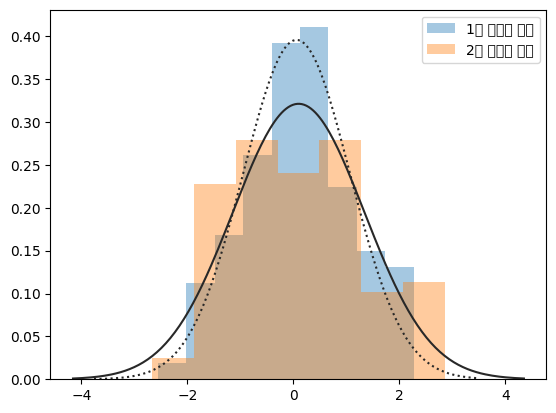

In [59]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = stats.norm(0, sigma_1).rvs(N1)
x2 = stats.norm(0, sigma_2).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [61]:
stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [62]:
stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [63]:
stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.006113515497020576)

## 정규성검정
- 확률분포가 가우시안 정규분포를 따르는지 아닌지를 확인해야 함
- 이러한 검정을 정규성검정(normality test)
- 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test)은 사실 정규분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법
    - scipy.stats.ks_2samp
    - statsmodels.stats.diagnostic.kstest_normal

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\3170505786.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13056\3170505786.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kde=

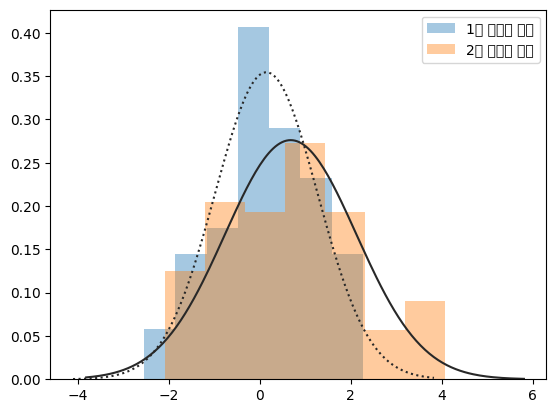

In [70]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = stats.norm(0, 1).rvs(N1)
x2 = stats.norm(0.5, 1.5).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

## t검정
- 표본평균이 모집단 평균과 동일한지 여부
- 모집단의 분산정보 없음. 모집단과 표본의 분산이 같다는 가정하에 진행

Q.표본 : 20명의 벤처기업 경영자 혈압 평균 135, 표준편차 25

일반인의 혈압 평균 115인 경우 벤처기업경영자의 혈압이 일반인보다 높은지 아닌지 검정하시오
(양측 검정) 95%

In [71]:
rv = stats.norm(0,1)
rv

In [72]:
mu = 115
n = 20
xbar = 135
sigma = 25

zscore = (xbar - mu) / (sigma/np.sqrt(n))
p = 2* (1 - rv.cdf(zscore))
alpha = 0.05

if p < alpha:
    print('reject H0')
else:
    print('do not reject H0')
print(p)

reject H0
0.00034661935113455833


p_value < 0.05 이므로 귀무가설 기각

## 1-sample T-test

H0: 어느 한 집단의 자료들 평균은 0이다.

H1: 어느 한 집단의 자료들 평균은 0이 아니다.

In [15]:
np.random.seed(1)
mu = 0
n = 10
x = stats.norm(mu).rvs(n) # 랜덤한 데이터 10개 생성
print(x, np.array(x).mean())

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038] -0.09714089080609985


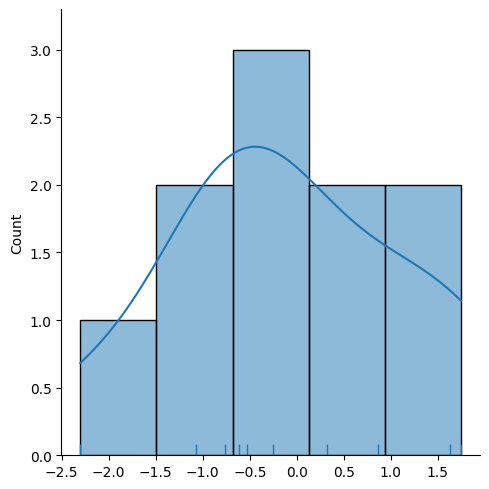

In [16]:
sns.displot(x, kde=True, rug = True) # kde = 선, rug = 밑의 그래프
plt.show()

In [17]:
result2 = stats.ttest_1samp(x, popmean = mu)
result2

TtestResult(statistic=-0.2447082263331715, pvalue=0.8121703589172078, df=9)

#### 하나의 집단의 표본평균이, 예측된 평균과 차이가 있는지 검증

- 전체 학생들 중 20명의 학생들을 추려 키를 재서 전체 학생들의 평균 키가 175cm인지 아닌지 알아보고 싶다.
    - 귀무가설: 학생들의 평균 키가 175cm이다.
    - 대립가설: 학생들의 평균 키가 175cm가 아니다.

In [73]:
np.random.seed(1)
height = 180+ np.random.normal(0, 5, 20)

In [74]:
stats.ttest_1samp(height, 175)

TtestResult(statistic=3.434767428066461, pvalue=0.00277711459981648, df=19)

p-value가 0.003으로, 기각역을 p <0.05로 설정했을 때 귀무가설을 기각한다. 
 
귀무가설이 참일 때(학생들의 실제 평균 키가 175cm일 때) 위와 같은 표본을 얻을 확률이 0.003으로, 학생들의 평균 키는 175cm가 아니라고 할 수 있다.

## 2-sample T-test
- 두 집단 평균 비교, 모수적 통계방법
- 표본이 정규성, 등분산성, 독립성 만족할 경우 적용 가능

#### 1) Unpaired T-test(독립 표본 t-검정): 서로  다른  두 집단
- 집단 1과 집단 2에서 각각 20명의 학생들을 추려, 각 집단의 키가 같은지, 다른지 알아보고 싶다.
    - 귀무가설: 두 집단의 평균 키는 같다.
    - 대립가설: 두 집단의 평균 키는 같지 않다.(양측 검정)
    
- 등분산여부에 따라 달라짐 (등분산 여부는 F검정으로 확인)

In [76]:
np.random.seed(1)
group1Heights = 170+ np.random.normal(0, 5, 20 )
group2Heights = 175+ np.random.normal(0, 10, 20 )

In [79]:
# 등분산 가정
r1 = stats.ttest_ind(group1Heights,group2Heights) # default는 등분산 가정
r1

Ttest_indResult(statistic=-2.329449625074386, pvalue=0.025249639899591222)

In [80]:
# 이분산 가정
r2 = stats.ttest_ind(group1Heights,group2Heights,equal_var=False)
r2

Ttest_indResult(statistic=-2.329449625074386, pvalue=0.025992343643634952)

#### 2) Paired t-test(대응 표본 t-검정): 같은 집단의 사전, 사후 평균 비교

- 동일한 집단의 사전, 사후 평균 비교 다이어트 약을 복용한 사람들 중 20명을 추려 복용 전/후의 체중 차이가 유의미한지 알아보고 싶다.
    - 귀무가설: 복용 전/후의 체중 차이가 없다.
    - 대립가설: 복용 전/후의 체중 차이가 있다.

In [81]:
np.random.seed(1)

#before treatment : mean 60, standard deviation 5
beforeWeights = [60 + np.random.normal(0, 5) for _ in range(20)]

#after treatment : mean 0.99-fold decrease, standard deviation 0.02
afterWeights = [w * np.random.normal(0.99, 0.02) for w in beforeWeights]

In [82]:
stats.ttest_rel(beforeWeights,afterWeights) 

TtestResult(statistic=2.9154993563693186, pvalue=0.008871163766572827, df=19)

pvalue<0.05 : 귀무가설 기각 : 효과가 있다

In [1]:
import numpy as np

In [2]:
a = [1, 4, 3, 6, 4, 7, 8, 10, 5, 11]
b = [2, 5, 6, 3, 7, 4, 8, 3, 9, 19]

a_num = np.array(a)
b_num = np.array(b)

In [3]:
# 평균
a_mean = np.mean(a_num)
b_mean = np.mean(b_num)

# 분산
def var(inp):
    tmp = []
    for i in range(len(inp)):
        tmp.append((inp[i] - np.mean(inp))**2)
    result = np.sum(tmp) / (len(inp) - 1)
    return result
    
a_var = var(a_num)
b_var = var(b_num)

# 통합분산
var_a_b = ((len(a_num) - 1) * a_var + (len(b_num) - 1) * b_var) / ((len(a_num) - 1) + (len(b_num) - 1))

# 표준오차
se_a_b = np.sqrt(var_a_b * (1 / len(a_num) + 1 / len(b_num)))

# t-test 구현
t_test = (a_mean - b_mean) / se_a_b
print(t_test)

-0.37882446154538096


In [4]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-0.37882446154538085, pvalue=0.709249588375751)

귀무가설 기각하지 않음. 효과가 없음

## F검정
- F 검정(F test)은 두 집단 간에 분산의 차이가 있는지를 통계적인 방법으로 검정
- 등분산 여부를 검정
- 등분산 검정(test of equal variances)은 두 집단 혹은 세 집단 이상 사이에 산포도(대표적인 산포도로 분산이 있음) 차이가 있는지를 통계적인 방법으로 검정하는 것으로, 두 집단 이상의 분산 차이를 검정할 때 사용할 수 있다. 
    - 귀무가설: 각 집단의 분산이 같음
    - 대립가설: 각 집단의 분산이 차이가 있음


In [86]:
#남녀의 영어 성적에 대한 분산 분석
from scipy.stats import f_oneway
boy = np.array( [46,47,58,47,27,58,56,26,47,25] )
girl= np.array( [78,57,31,28,67,77,36,57,36,57] )
f_oneway( boy, girl)  

F_onewayResult(statistic=1.4591624718860445, pvalue=0.24269553293319623)

pvalue가 0.05보다 작지 않으므로 귀무가설 채택. 분산 같음

In [87]:
#영화의 광고 전후에 대한 선호도
bf = np.array([11,14,18,21,26,28,37,45,48,60,64] )
af = np.array([13,15,17,18,19,23,25,28,29,36,37])

f_oneway( bf, af) 

F_onewayResult(statistic=2.835186691980833, pvalue=0.10776455501678374)

pvalue가 0.05보다 작지 않으므로 귀무가설 채택. 분산 같음

https://makeit.tistory.com/129

## 표본정규분포 z검정

- 귀무가설: 표본평균의 평균은 모평균과 같다 E(x) = m
- 대립가설: 아니다 𝐸(𝑥)≠𝑚E(x)≠m (양측검정)
- 대립가설: 아니다 𝐸(𝑥)>𝑚E(x)>m (단측검정)

- 모집단 정보가 있다

1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오

In [88]:
rv = stats.norm(11, 4)
1-rv.cdf(14)

0.22662735237686826

2. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률 구하시오

In [89]:
rv = stats.norm(800, 30)
rv.cdf(760)

0.09121121972586788

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오

In [92]:
rv = stats.norm(70, np.sqrt(64))
rv.cdf(90)-rv.cdf(80)

0.09944010834107919

#### p-value
- 유의확률
- probability value(확률값)
- 샘플데이터를 이용하여 모집단을 추론할때 사용
- p값이 0.05 보다 작다: 어떤 사건이 우연히 발생할 확률이 5% 보다 작다(유의하다:원인과 결과가 있다. 즉 우연이 아니다)
    - 0.05보다 작다 == 95% 보다 높다
    - 0.01보다 작다 == 99% 보다 높다
    
- p값은, 어떤 사건이 우연히 발생할 확률
    - 0.05보다 작으면, 우연히 발생할 확률이 5%보다 작음. 우연이 아님(=유의하다. 원인과 결과가 있다. 신뢰수준 하에서 유의한 관계임)

Q.여학생

전체평균(모평균) : 600

표본 크기 : 20

표본 평균 : 641

모집단 편차 : 100

pvalue?

In [93]:
rv = stats.norm( 0,1 )
1 - rv.cdf((641-600)/(100/np.sqrt(20)))

0.033358497950542465

In [94]:
rv = stats.norm(0,1)
zscore = (641-600)/(100/ np.sqrt(20))
z_stat = rv.cdf(zscore) 
p_value = 1 - z_stat
p_value

0.033358497950542465

https://heannim-world.tistory.com/61